In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import math
from sklearn.externals.six import StringIO 
import pydot
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
train_data = pd.read_csv("../Data/CE802_P2_Data.csv",sep=',')
test_data = pd.read_csv("../Data/CE802_P2_Test.csv",sep=',')
knn_file="Results/CE802_P2_Test_KNN.csv"
lin_file="Results/CE802_P2_Test_SVM_LIN.csv"
rbf_file="Results/CE802_P2_Test_SVM_RBF.csv"
dtc_file="Results/CE802_P2_Test_DT.csv"


C:\Conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.00,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.31,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,NaN,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.92,False


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.22,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,NaN,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.61,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,NaN,NaN


In [4]:
def clean_data(data):
    for i in range(1,data.shape[1]):
#         false_mean=data[data["Class"]== False]["F"+str(i)].mean()
#         true_mean=data[data["Class"]== True]["F"+str(i)].mean()
        col_mean=data["F"+str(i)].mean()
        data['F'+str(i)] = data['F'+str(i)].replace(np.nan, col_mean)
    return data
    

In [5]:
train_data = clean_data(train_data)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.240000,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.320000,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.250000,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.150000,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,10.743013,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.000000,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.310000,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,10.743013,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.920000,False


In [6]:
test_data = clean_data(test_data)
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,NaN


In [7]:
X = train_data.drop('Class', axis=1)
columns=X.columns
y = train_data['Class']
X_test=test_data.drop('Class',axis=1)

In [8]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1,test_size = 0.20)

In [10]:
knn = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
rbf = SVC(kernel='rbf', C=1e2, gamma=0.03)
lin = SVC(kernel='linear')
dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)


In [11]:
knn.fit(X_train, y_train)
rbf.fit(X_train, y_train)
lin.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
cv_score = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print("CV mean score: ", cv_score.mean())
cv_score = cross_val_score(rbf, X, y, cv = 10, scoring='accuracy')
print("CV mean score: ", cv_score.mean())
cv_score = cross_val_score(lin, X, y, cv = 10, scoring='accuracy')
print("CV mean score: ", cv_score.mean())
cv_score = cross_val_score(dtc, X, y, cv = 10, scoring='accuracy')
print("CV mean score: ", cv_score.mean())

CV mean score:  0.7959999999999999
CV mean score:  0.8973333333333334
CV mean score:  0.8513333333333334
CV mean score:  0.774


In [13]:
y_predict_knn = knn.predict(X_valid)
y_predict_rbf = rbf.predict(X_valid)
y_predict_lin = lin.predict(X_valid)
y_predict_dtc = dtc.predict(X_valid)

In [14]:
print(accuracy_score(y_valid, y_predict_knn))
print(accuracy_score(y_valid, y_predict_rbf))
print(accuracy_score(y_valid, y_predict_lin))
print(accuracy_score(y_valid, y_predict_dtc))

0.7966666666666666
0.92
0.8366666666666667
0.77


In [15]:
print("KNN")
print(confusion_matrix(y_valid,y_predict_knn))
print(classification_report(y_valid,y_predict_knn))
print()
print("SVM classifier with rbf")
print(confusion_matrix(y_valid,y_predict_rbf))
print(classification_report(y_valid,y_predict_rbf))
print()
print("SVM classifier with linear function")
print(confusion_matrix(y_valid,y_predict_lin))
print(classification_report(y_valid,y_predict_lin))
print()
print("decision tree classifier")
print(confusion_matrix(y_valid,y_predict_dtc))
print(classification_report(y_valid,y_predict_dtc))

KNN
[[130  23]
 [ 38 109]]
              precision    recall  f1-score   support

       False       0.77      0.85      0.81       153
        True       0.83      0.74      0.78       147

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300


SVM classifier with rbf
[[145   8]
 [ 16 131]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       153
        True       0.94      0.89      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


SVM classifier with linear function
[[132  21]
 [ 28 119]]
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       153
        True       0.85      0.81      0.83       147

    accuracy                           0.84    

In [16]:
error = []
score=[]
max_score=0.0
optimal_neighbor_number=5
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_train, y_train)
    cv_score = cross_val_score(knn, X, y, cv =10, scoring='accuracy')
    print("#",i,"CV mean score: ", cv_score.mean())
    pred_i = knn.predict(X_valid)
    err=np.mean(pred_i != y_valid)
    error.append(err)
    score.append(cv_score.mean())
    print("Error: ", err)
    print("=======================")
    if cv_score.mean()>max_score:
        max_score=cv_score.mean()
        optimal_neighbor_number=i

# 1 CV mean score:  0.7333333333333333
Error:  0.2866666666666667
# 2 CV mean score:  0.73
Error:  0.2966666666666667
# 3 CV mean score:  0.7586666666666667
Error:  0.26
# 4 CV mean score:  0.756
Error:  0.25
# 5 CV mean score:  0.7706666666666666
Error:  0.22
# 6 CV mean score:  0.7693333333333333
Error:  0.23666666666666666
# 7 CV mean score:  0.7853333333333333
Error:  0.23333333333333334
# 8 CV mean score:  0.7833333333333334
Error:  0.23666666666666666
# 9 CV mean score:  0.7926666666666666
Error:  0.22666666666666666
# 10 CV mean score:  0.7933333333333333
Error:  0.21666666666666667
# 11 CV mean score:  0.7979999999999999
Error:  0.22
# 12 CV mean score:  0.7913333333333332
Error:  0.22
# 13 CV mean score:  0.7973333333333332
Error:  0.18666666666666668
# 14 CV mean score:  0.7959999999999999
Error:  0.20333333333333334
# 15 CV mean score:  0.7959999999999999
Error:  0.20333333333333334
# 16 CV mean score:  0.7966666666666666
Error:  0.19333333333333333
# 17 CV mean score:  0.78

# 98 CV mean score:  0.8019999999999999
Error:  0.22666666666666666
# 99 CV mean score:  0.804
Error:  0.23


Text(0, 0.5, 'Mean Error')

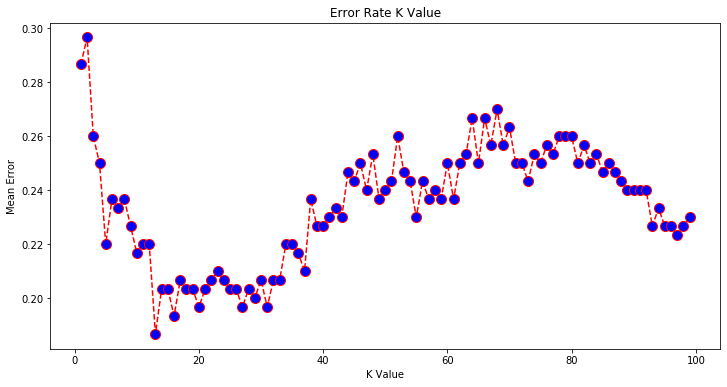

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

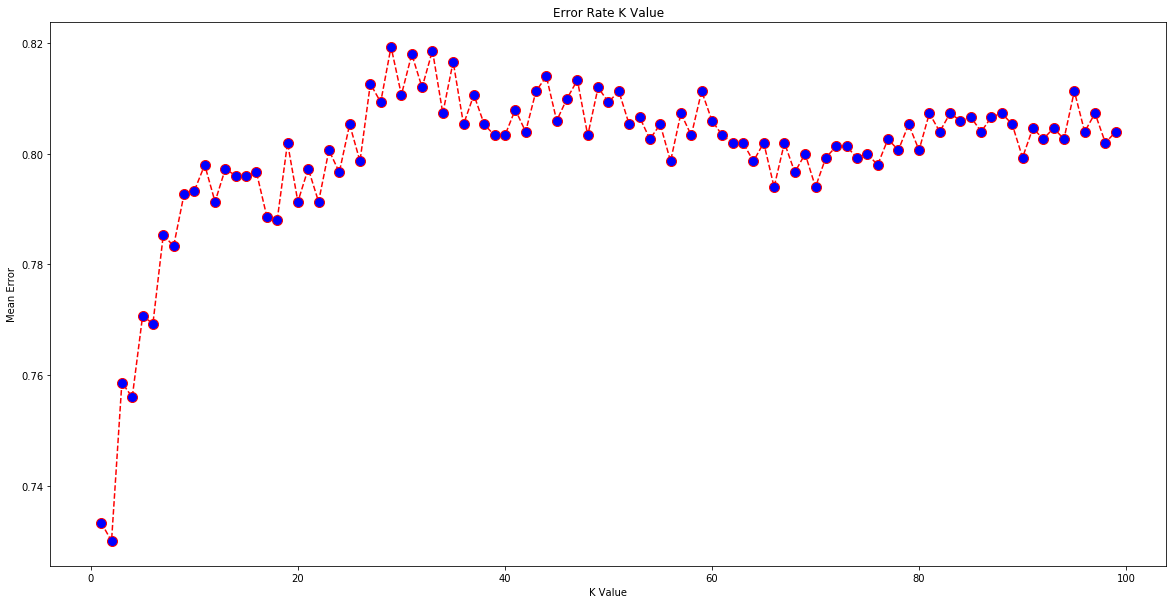

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 100), score,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [19]:
print("Optimal k-number of nearest neighbours is",optimal_neighbor_number)

Optimal k-number of nearest neighbours is 29


In [20]:
knn = KNeighborsClassifier(n_neighbors=optimal_neighbor_number,metric='manhattan')
knn.fit(X_train, y_train)
cv_score = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')

In [21]:
print("CV mean score: ", cv_score.mean())
y_predict = knn.predict(X_test)
for i in range(0,len(y_predict)):
    test_data.loc[i,'Class']=y_predict[i]

CV mean score:  0.8193333333333334


In [22]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,False
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,True
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,False
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,False
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,False


In [23]:
test_data.to_csv(knn_file, sep=',')

In [24]:
y_pred_test = lin.predict(X_test)
y_pred_test
for i in range(0,len(y_pred_test)):
    test_data.loc[i,'Class']=y_pred_test[i]


In [25]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,True
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,True
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,False
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,False
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,False


In [26]:
test_data.to_csv(lin_file, sep=',')

In [27]:
y_pred_test = rbf.predict(X_test)
y_pred_test
for i in range(0,len(y_pred_test)):
    test_data.loc[i,'Class']=y_pred_test[i]

In [28]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,False
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,False
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,False
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,False
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,False


In [29]:
test_data.to_csv(rbf_file, sep=',')

In [30]:
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=columns)

In [37]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("Results/tree.tif")

In [38]:
from PIL import Image
f = Image.open("Results/tree.tif").show()

In [33]:
y_predict_test = dtc.predict(X_test)
for i in range(0,len(y_predict_test)):
    test_data.loc[i,'Class']=y_predict_test[i]


In [34]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,True
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,False
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,False
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,False
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,False


In [35]:
test_data.to_csv(dtc_file, sep=',')